# Plot sea water temperature at Buoy "Bahia de Palma"

The temperature time series is represented for selected months and years, the months are overlaid in order to make easier the comparison.

In [19]:
%matplotlib inline
import glob
import os
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib import dates
import datetime, time, calendar
import matplotlib as mpl
import locale
import matplotlib.font_manager as fm
import matplotlib.image as image
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
mpl.rcParams.update({'font.size': 20})
prop = fm.FontProperties(fname='/home/ctroupin/.fonts/Amarillo.ttf')

In [9]:
figdir = "/home/ctroupin/Pictures/SOCIB"
figname = "temp_bahiadepalma_" + datetime.datetime.today().strftime('%Y%m%d')
figname

'temp_bahiadepalma_20170203'

In [3]:
file_basename = "http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/"
file_list = ['buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-06.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-07.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-06.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-07.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-06.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-07.nc']
file_list = [file_basename + s for s in file_list]

In [10]:
file_basename = "http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/"
file_list = ['buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-01.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-02.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-01.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-02.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-01.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-02.nc'
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2017-01.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2017-02.nc']
file_list = [file_basename + s for s in file_list]

# Load data

In [13]:
def read_time_temp_mooring(filelist):
    buoytemperature = np.array([])
    buoytemperature_QC = np.array([])
    buoytime = np.array([])
    buoydate = np.array([])
    buoyyear = np.array([])
    
    for datafiles in filelist:
        print(datafiles)
        try: 
            with netCDF4.Dataset(datafiles) as nc:
                buoytemperature_QC = np.hstack((buoytemperature_QC, nc.variables['QC_WTR_TEM_SBE37'][:]))
                buoytemperature = np.hstack((buoytemperature, nc.variables['WTR_TEM_SBE37'][:]))
                ttime = nc.variables['time'][:]
                buoytime = np.hstack((buoytime, ttime))
                buoytimeunits = nc.variables['time'].units
                buoyyear = np.hstack((buoyyear, 
                                      netCDF4.num2date(ttime[0], buoytimeunits).year * np.ones_like(ttime)))
        except RuntimeError:
            print('File does not exist')
            
    buoytemperature = np.ma.masked_where(buoytemperature_QC !=1, buoytemperature)
    buoydate = netCDF4.num2date(buoytime, buoytimeunits)
    return buoytemperature, buoytime, buoydate, buoyyear

In [14]:
buoytemperature, buoytime, buoydate, buoyyear = read_time_temp_mooring(file_list)

http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-01.nc
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-02.nc
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-01.nc
File does not exist
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-02.nc
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-01.nc
File does not exist
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recor

In [15]:
buoydate = np.array([dd.replace(year=int(buoyyear.min())) for dd in buoydate])

# Make the plot

In [17]:
colorlist = ['c', 'y', 'b', 'k']

In [8]:
#im = image.imread('/home/ctroupin/Presentations/figures4presentations/logo/logo_socib_square.png')

2014.0
(0, 1415)
2015.0
(1416, 1618)


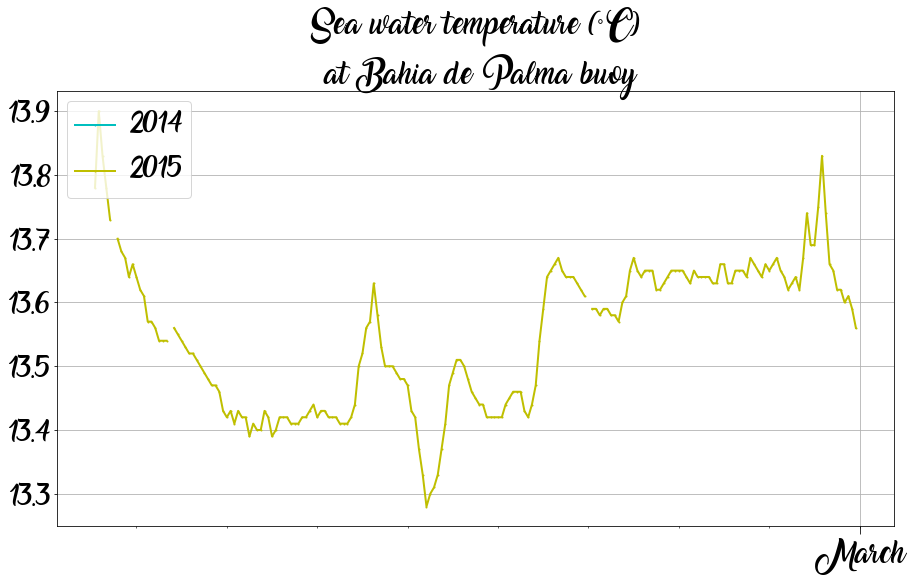

In [21]:
#mpl.rcParams['font.family'] = prop.get_name()
hfmt = dates.DateFormatter('%B')

fig, ax= plt.subplots(num=None, figsize=(15, 8))

i=0
for years in np.unique(buoyyear):
    print years
    indices = np.where(buoyyear == years)[0]
    print(indices.min(), indices.max())
    plt.plot(buoydate[indices], 
             buoytemperature[indices],
             marker = 'o',
             markeredgecolor = colorlist[i],
             color = colorlist[i], ms=1, label=int(years))
    i += 1
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(hfmt)
plt.title('Sea water temperature ($^{\circ}$C)\n at Bahia de Palma buoy', fontproperties=prop)
#fig.autofmt_xdate()
hl = plt.legend(loc=2, prop=prop)
plt.grid()
newax = fig.add_axes([0.8, 0.15, 0.1, 0.1], anchor='NE', zorder=1)
#newax.imshow(im)
newax.axis('off')
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
#plt.savefig(os.path.join(figdir, figname), dpi=300)
plt.show()
plt.close()

In [22]:
buoytemperature

masked_array(data = [-- -- -- ..., 13.61 13.59 13.56],
             mask = [ True  True  True ..., False False False],
       fill_value = 1e+20)